# **Goal:**
* Understand the structure and patterns in the data.

* Visualize key trends affecting mental health.

* Prepare insights for your Tableau dashboard.

## 1. Import Libraries & Load Data

In [1]:
# Import libraries
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset and initial data checks
df = pd.read_csv('/home/srs/Desktop/IITM/Projects/mental_health_in_tech/data/raw/mental_health_survey.csv')
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [3]:
sys.path.append('/home/srs/Desktop/IITM/Projects/mental_health_in_tech/scripts')
from data_cleaning import load_and_clean

#Load cleaned dataset and data check
df = load_and_clean('/home/srs/Desktop/IITM/Projects/mental_health_in_tech/data/raw/mental_health_survey.csv')
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1250 entries, 0 to 1258
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1250 non-null   object
 1   Age                        1250 non-null   int64 
 2   Gender                     1250 non-null   object
 3   Country                    1250 non-null   object
 4   state                      1250 non-null   object
 5   self_employed              1250 non-null   object
 6   family_history             1250 non-null   int64 
 7   treatment                  1250 non-null   int64 
 8   work_interfere             1250 non-null   object
 9   no_employees               1250 non-null   object
 10  remote_work                1250 non-null   int64 
 11  tech_company               1250 non-null   object
 12  benefits                   1250 non-null   object
 13  care_options               1250 non-null   object
 14  wellness_prog

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
Gender_Encoded               0
Work_Interfere_Encoded       0
Care_Options_Encoded         0
dtype: int64

## 2. Demographics

Text(0.5, 1.0, 'Age Distribution of Repondents')

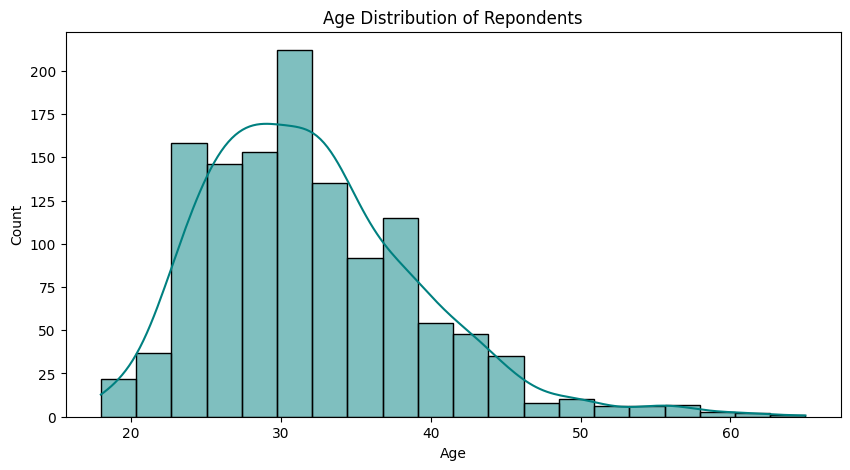

In [4]:
# Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=20, kde=True, color='teal')
plt.title('Age Distribution of Repondents')

/tmp/ipykernel_33864/4131104698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='cool')


Text(0.5, 1.0, 'Gender Distribution')

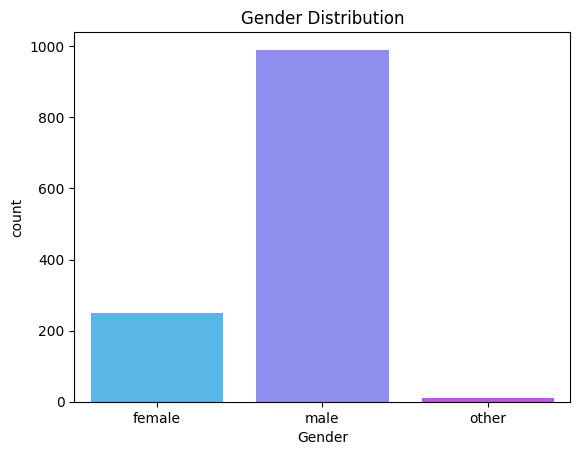

In [5]:
# Gender breakdown
sns.countplot(data=df, x='Gender', palette='cool')
plt.title('Gender Distribution')

## 3. Work Factors vs Treatment

Text(0.5, 1.0, 'Family History vs Seeking Treatment')

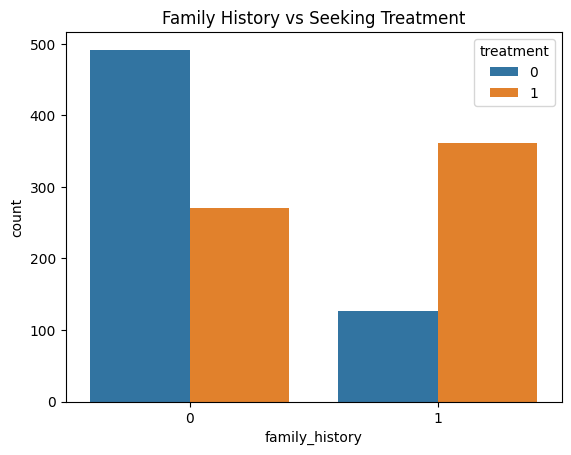

In [6]:
# Family History vs Treatment
sns.countplot(data=df,x='family_history', hue='treatment')
plt.title('Family History vs Seeking Treatment')

Text(0.5, 1.0, 'Remote Work vs Seeking Treatment')

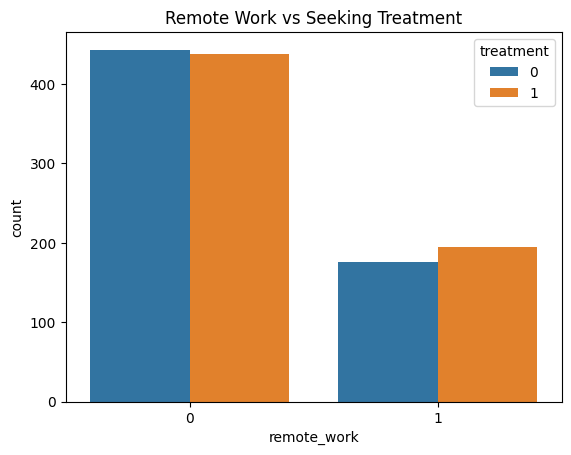

In [7]:
# Remote Work vs Treatment
sns.countplot(data=df, x='remote_work', hue='treatment')
plt.title('Remote Work vs Seeking Treatment')

Text(0.5, 1.0, 'Distribution by Company Size')

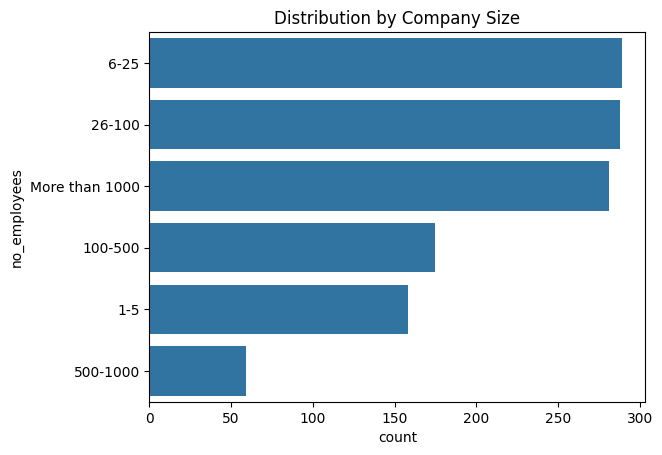

In [8]:
# Company Size Breakdown
sns.countplot(data=df, y='no_employees', order=df['no_employees'].value_counts().index)
plt.title('Distribution by Company Size')

## 4. Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

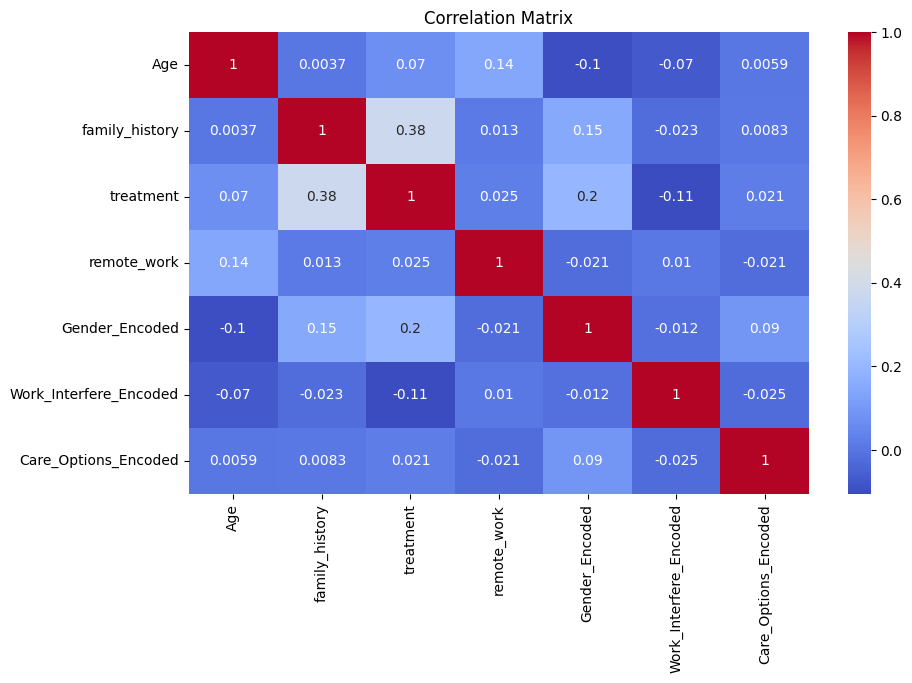

In [9]:
# Correlation matrix (numerical fields ony)
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

## Save Processed Data for Tableau

In [10]:
#Save processed Data for Tableau
df.to_csv('/home/srs/Desktop/IITM/Projects/mental_health_in_tech/data/processed/mental_health_cleaned.csv', index=False)
print("Cleaned data saved for Tableau.")

Cleaned data saved for Tableau.
